# Introduction

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("input/df.csv", dtype={"Age": np.float64}, )
test  = pd.read_csv("input/test.csv", dtype={"Age": np.float64}, )

# Manual Exploration

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [54]:
# Peak at the top of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [79]:
sex_class = df.groupby(['Sex', 'Pclass'])
sex_class.mean()['Survived']

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [86]:
def age_hist(df):
    
    bins = np.arange(0, df['Age'].max() + 10, 10)

    key = 'Age'
    nonsurv_vals = df[df['Survived'] == 0][key].reset_index(drop = True).dropna()
    surv_vals = df[df['Survived'] == 1][key].reset_index(drop = True).dropna()

    plt.hist(nonsurv_vals, bins = bins, alpha = 0.5, color = 'red', label = 'Did not survive')
    plt.hist(surv_vals, bins = bins, alpha = 0.5, color = 'green', label = 'Survived')
    plt.xlim(0, bins.max())
    plt.legend(framealpha = 0.8)

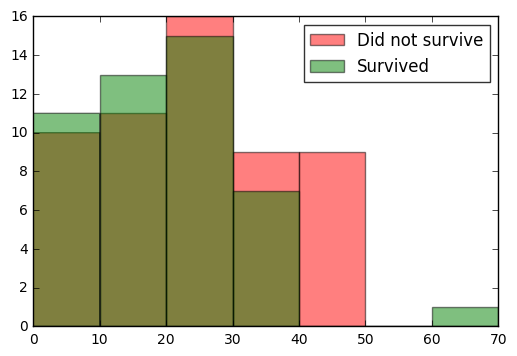

In [109]:
ma=train['Sex']=='male'
c1=train['Pclass']==1
ma_c1_df=train[fem&c3]
age_hist(ma_c1_df)

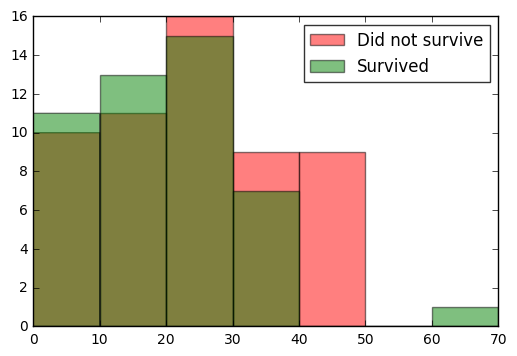

In [110]:
fem=train['Sex']=='female'
c3=train['Pclass']==3
fem_c3_df = train[fem&c3]
age_hist(fem_c3_df)

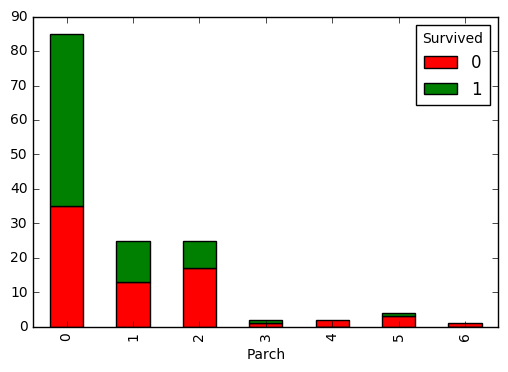

In [121]:
fem_c3_by_parch_df = pd.crosstab(fem_c3_df['Parch'], fem_c3_df['Survived'])
fem_c3_by_parch_df.plot.bar(stacked=True, color = ['r','g'])